# Aufgabe 4: Öffnungsfehler plankonvexe Linse (10$\,$pt) ***

Bestimmung der Öffnungsfehler einer plankonvexen Linse mit Hilfe eines Computerprogramms.

Nehmen Sie dazu an, dass Licht, ausgehend von einem Punkt auf der optischen Achse bei $z_0 = -40\,\text{cm}$, bei $z_L=0$ erst auf die planare Linsenseite einfällt. Die konvexe Seite, gegeben über $R^2 = z^2 + x^2$ mit dem Linsenradius $R = 10\,\text{cm}$, wird dann anschließend von den Strahlen getroffen. Das Linsenglas hat einen Brechnungsindex von $n = 1,5$.

Beachten Sie, dass gemäß der Konvention (s.h. Skript und die gegeben Plottingvorlage) hier die Optischeachse der z-Achse entspricht und die Meridionalebene parallel zur x-Achse liegt.

**a)**
Bestimmen Sie die Lage der Beiden Hauptebenen $h_1$ und $h_2$, sowie die Bildebene für einen Gegenstand bei $z_0$ in der paraxialen Näherung

**b)** Bestimmen Sie für die Bildebene die Koeffizenten $A_2$ und $B_4$ für die Reihenentwicklung der Abbildungsfehler (Gl. 2.122 im Skript).

Reichen Sie das *Jupyer Notebook* zusammen mit den anderen Aufgaben im moodle ein!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Konstanten

In [2]:
R = 10 # Linsenradius [cm]

zstart = -40 #[cm] max plotting range
zstop = 60 #[cm]
n = 1.5 # Brechungsindex

g = 40. # Gegenstandsweite [cm]

Folgende Zelle ist nur für das Plotten der Linse notwendig

In [3]:
xL_max = np.sqrt(R**2)
xL_min = -np.sqrt(R**2)

xL = np.linspace(xL_min, xL_max, 1000+1)
zL = np.sqrt(R**2-xL**2)

Die beiden Funktionen wandeln $^{\circ}$ in *rads* um und umgekehrt

In [4]:
def degreeToRad(phi):
    return phi/180.*np.pi

def radToDegree(phi):
    return phi/np.pi*180.

**a)** Hauptebenen, Brenn- und Bildweiten Berechnung

**b)** 
### Strahlen
Bestimmen sie die drei auftretetenen Teilstrahlen über deren Start- und Endpunkte als Funktionen von dem jeweils relevanten Winkel.

Ansatz...

In [5]:
# nimmt z0 und Öffnungswinkel alpha (in radians)
def start_stop_einlaufender_strahl(z0, alpha):
    ...
    return np.full(len(alpha), z0), narray, narray, x1
# gibt (zstart, zend, xstart, xend)

Ansatz...

In [6]:
# nimmt den Eintrittspunkt z1, x1 und Öffnungswinkel alpha (in radians)
def start_stop_linsen_strahl(z1, x1, alpha):
    ...
    return z1, z2, x1, x2, beta
# gibt (z1, z2, x1, x2, beta), wobei (z2, x2) = Austrittspunkt und der Brechungswinkel beta

Ansatz...

In [7]:
# nimmt den Austrittspunkt z2, x2 und Öffnungswinkel alpha (in radians)
def start_stop_auslaufender_strahl(z2, x2, beta):
    ...
    return z2, np.full(len(z2), b+h2), x2, x3
# gibt (z2, b, x2, x3), wobei (b, x3) der Treffpunkt auf der Bildebene ist

Bündelstrahlen für verschiedene Öffnungswinkel:

In [8]:
alphas = degreeToRad(np.linspace(-4, 4, 16*2+1)) # [rads]

z1, z2, x1, x2 = start_stop_einlaufender_strahl(-g, alphas)
z2, z3, x2, x3, beta = start_stop_linsen_strahl(z2, x2, alphas)
z3, z4, x3, x4 = start_stop_auslaufender_strahl(z3, x3, beta)

NameError: name 'narray' is not defined

### Strahlplotting

'\nfor i in range(z1.shape[0]):\n    plt.plot([z1[i], z2[i]], [x1[i], x2[i]], color="red", alpha=0.5)\n    plt.plot([z2[i], z3[i]], [x2[i], x3[i]], color="red", alpha=0.5)\n    plt.plot([z3[i], z4[i]], [x3[i], x4[i]], color="red", alpha=0.5)\n'

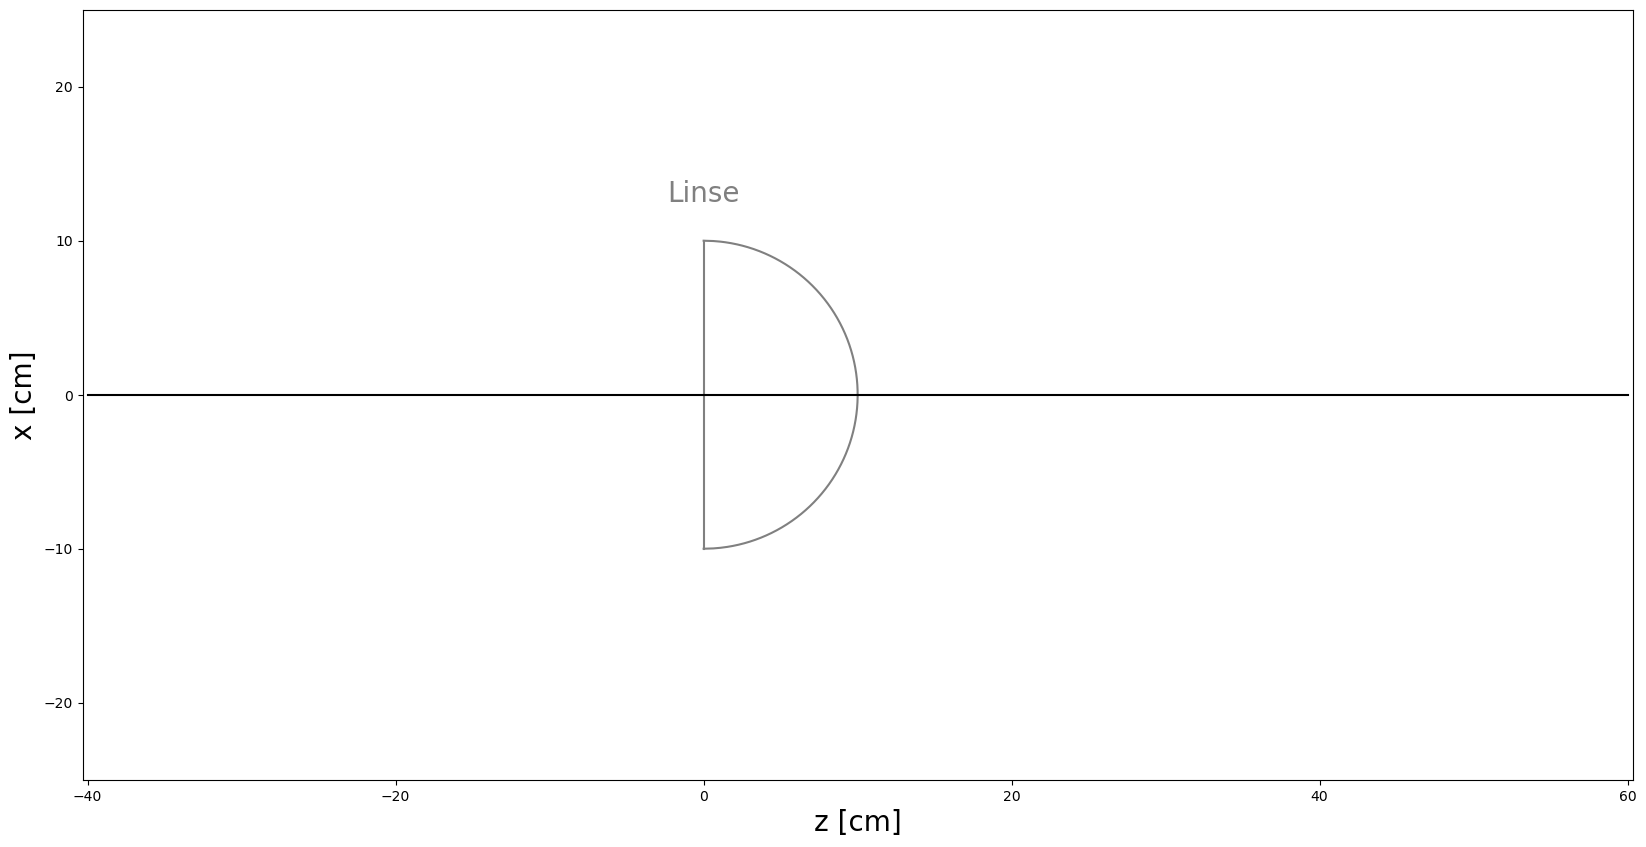

In [9]:
plt.figure(figsize=(20,10))

# Achsen
plt.axis("equal")
plt.xlim(zstart, zstop)
plt.ylim(-25, 25)
plt.xlabel("z [cm]", size=20)
plt.ylabel("x [cm]", size=20)

# Linse + Optischeachse
plt.text(0, R+R/4, "Linse", fontsize=20, color="gray", horizontalalignment="center")
plt.plot(zL, xL, color="gray")
plt.plot([0, 0], [xL_min, xL_max], color="gray")
plt.plot([zstart, zstop], [0, 0], color="black")

# Brennpunkte
#...

# Bildebene
#...

# Hauptebenen
#...


# Strahlenbündel
"""
for i in range(z1.shape[0]):
    plt.plot([z1[i], z2[i]], [x1[i], x2[i]], color="red", alpha=0.5)
    plt.plot([z2[i], z3[i]], [x2[i], x3[i]], color="red", alpha=0.5)
    plt.plot([z3[i], z4[i]], [x3[i], x4[i]], color="red", alpha=0.5)
"""

### Koeffizienten

In [ ]:
alphas_grad = radToDegree(alphas)
Npol = 3
paras = np.polyfit(alphas_grad, x4, Npol) # y = p[0] * x^3 +p[1] *x^2 + p[2] * x^1 + p[3]

In [ ]:
plt.figure()
plt.xlabel(r"$\alpha \, [{}^{\circ}]$", size=20)
plt.ylabel("x' [cm]", size=20)
plt.scatter(alphas_grad, x4, color="black", marker=".")
plt.plot(alphas_grad, np.poly1d(paras)(alphas_grad), color="red")

In [ ]:
print("A2 = %.4f cm grad^-1" % p[Npol-1])
print("B4 = %.4f cm grad^-3" % p[Npol-3])

### Was ist mit p[1] un p[3]?

Antwort!

### Was passiert mit $A_2$ für eine dünne Linse?

Antwort